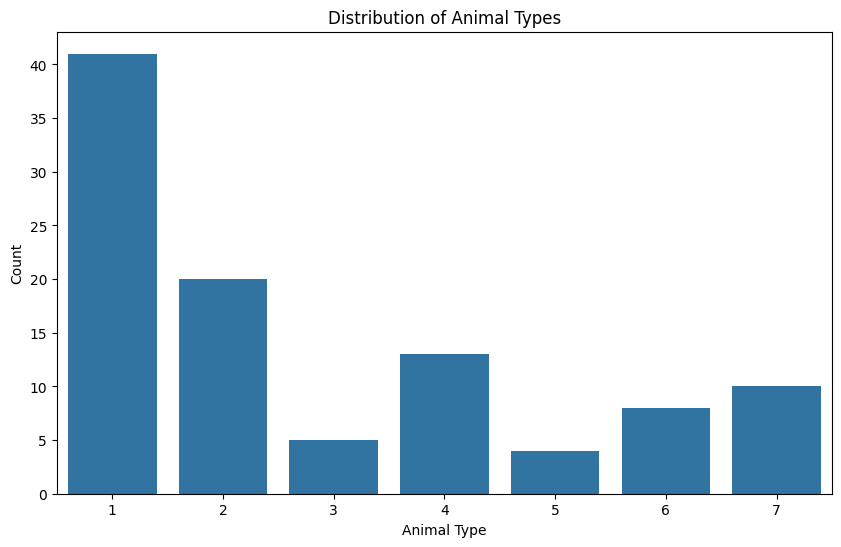

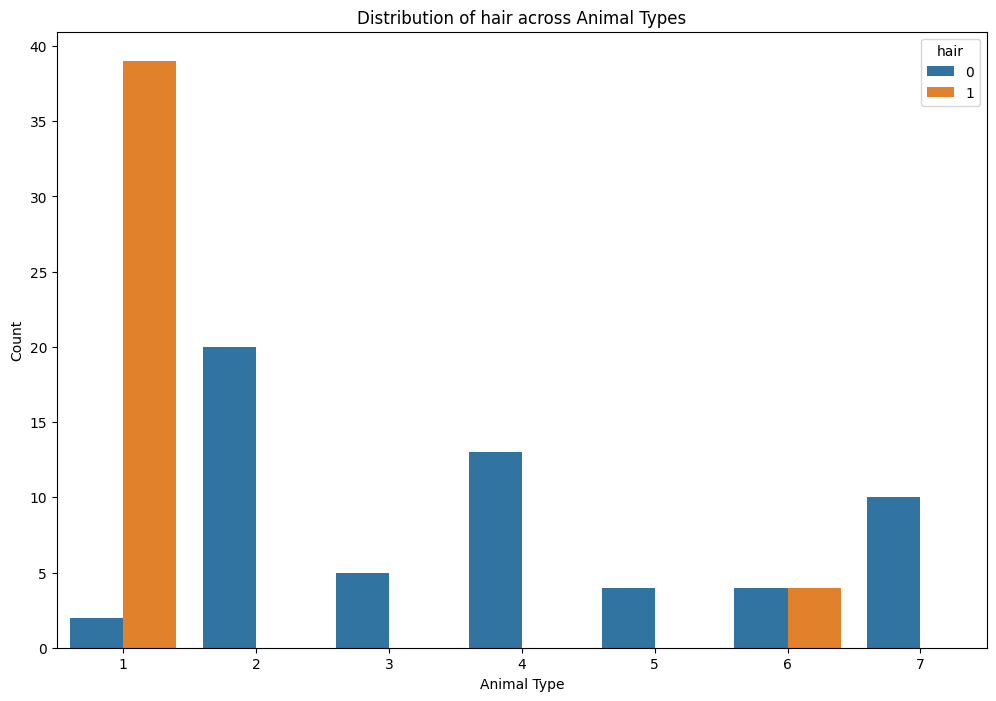

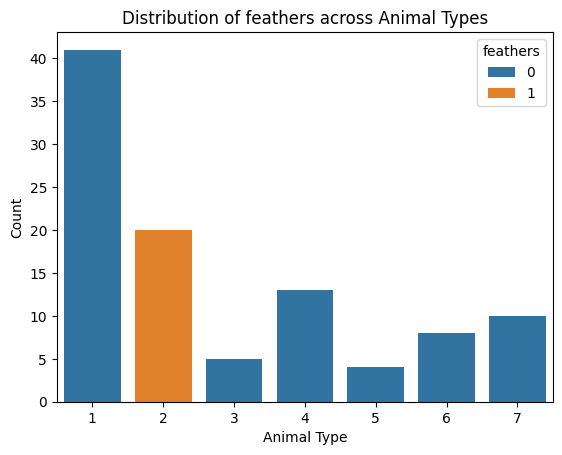

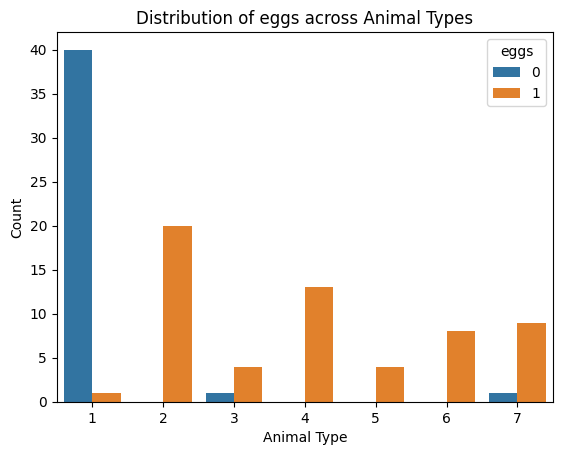

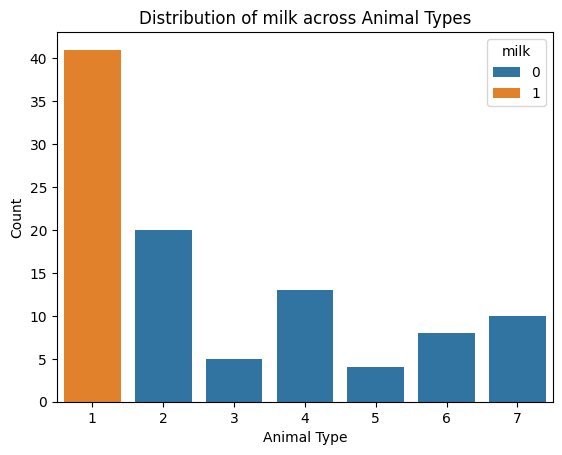

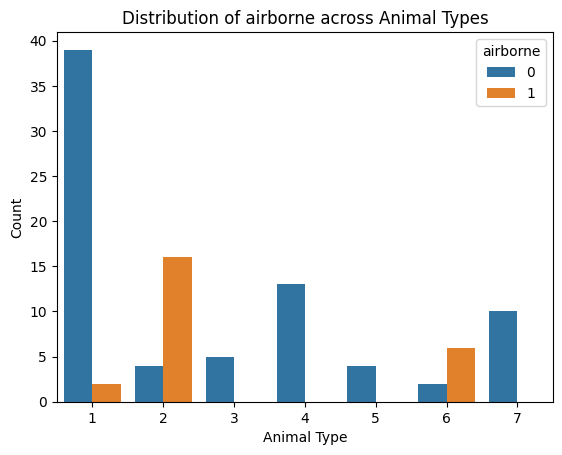

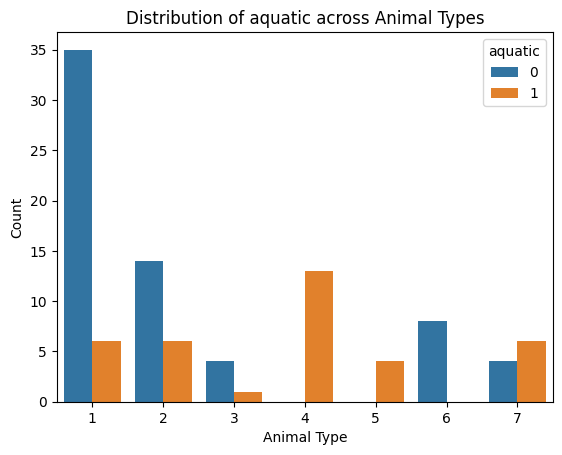

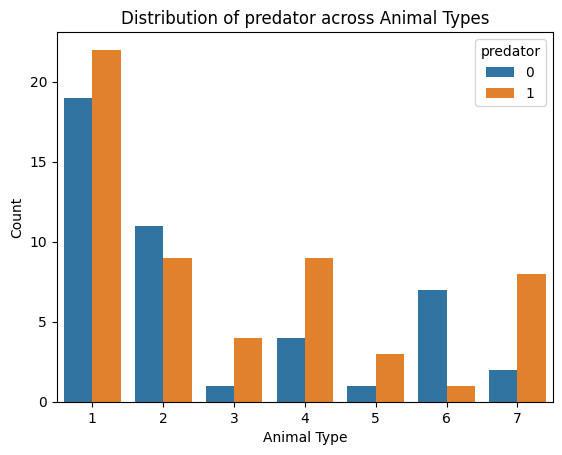

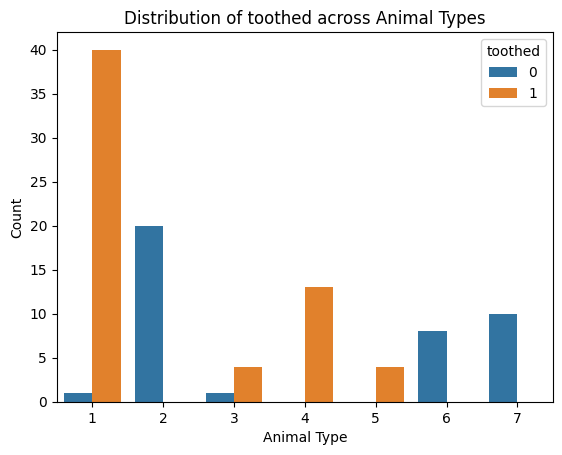

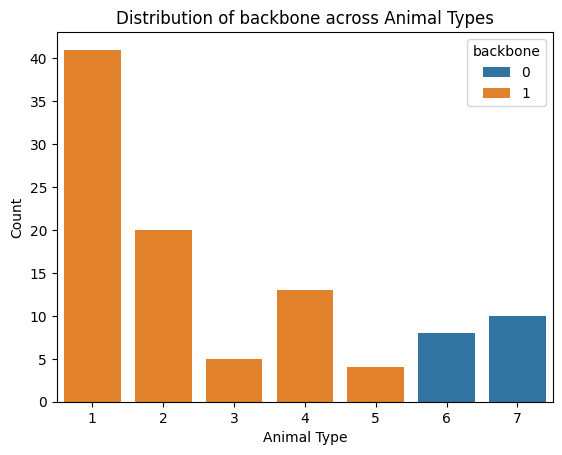

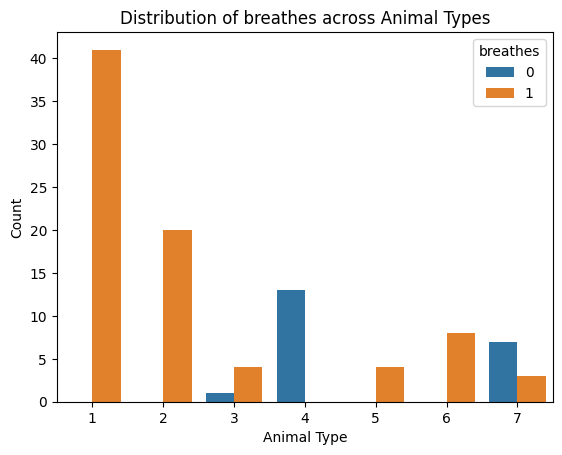

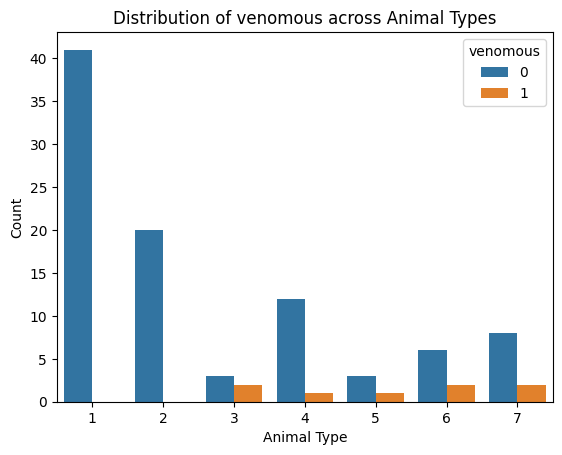

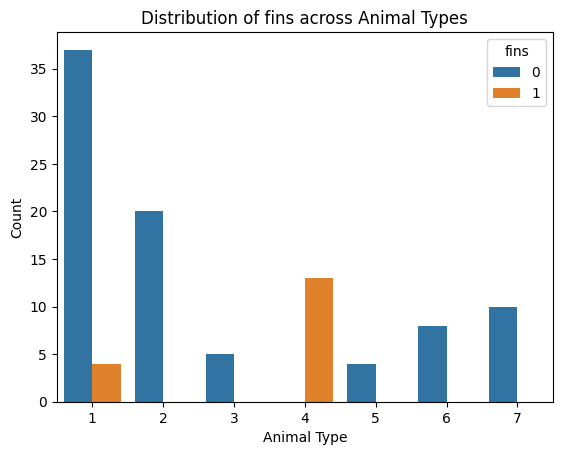

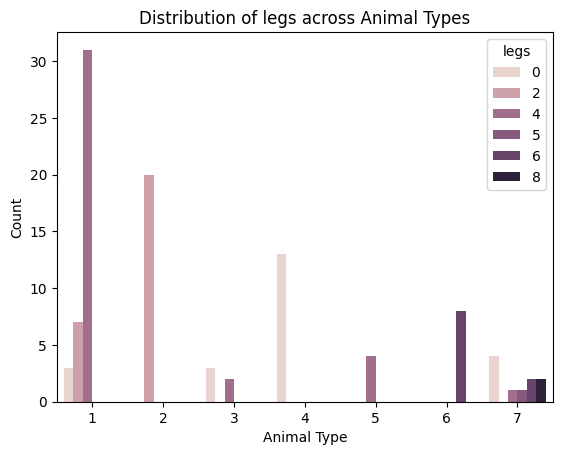

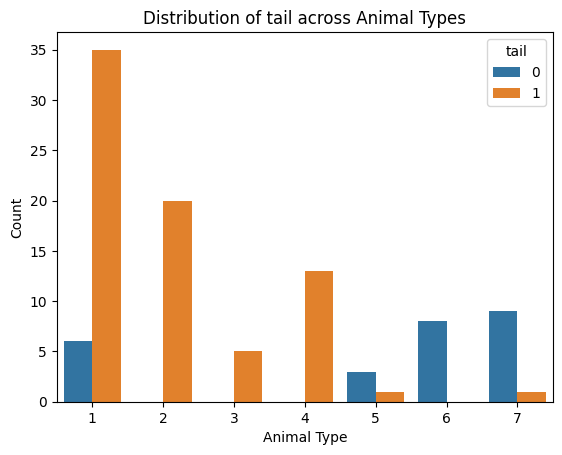

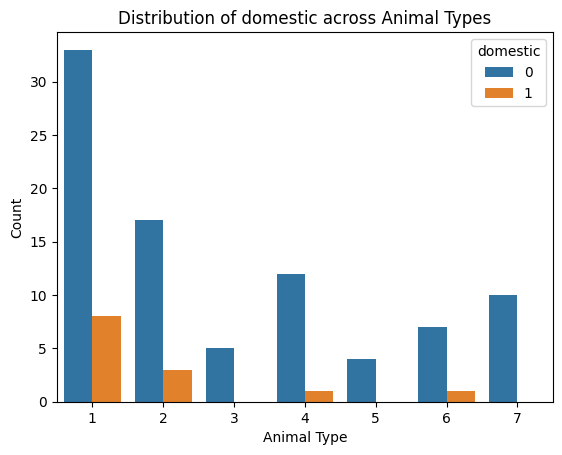

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


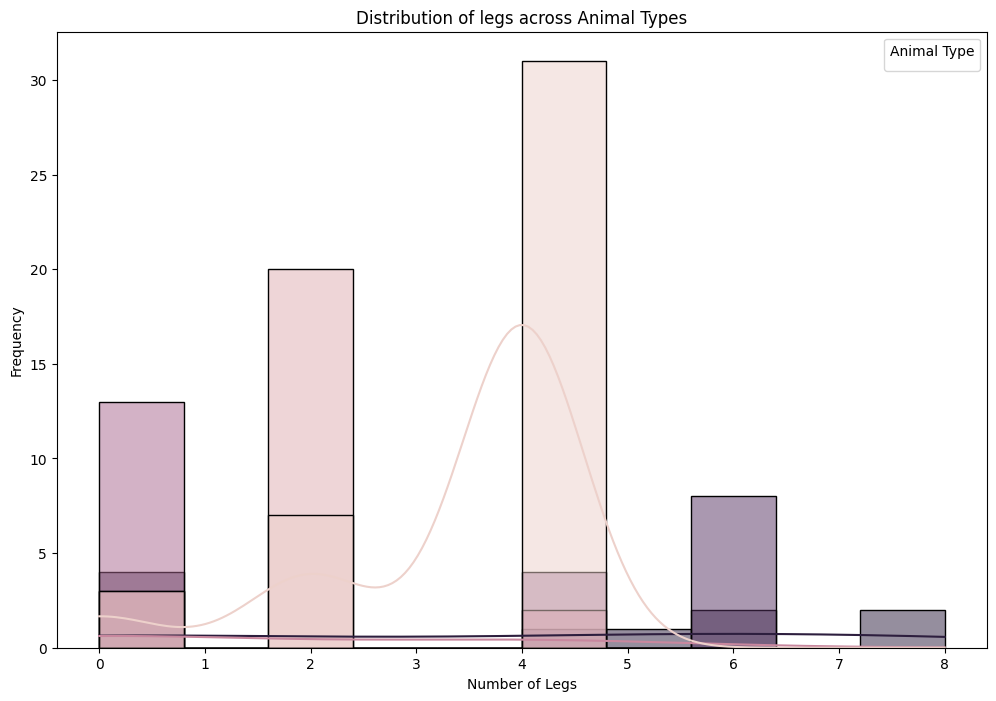

C:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


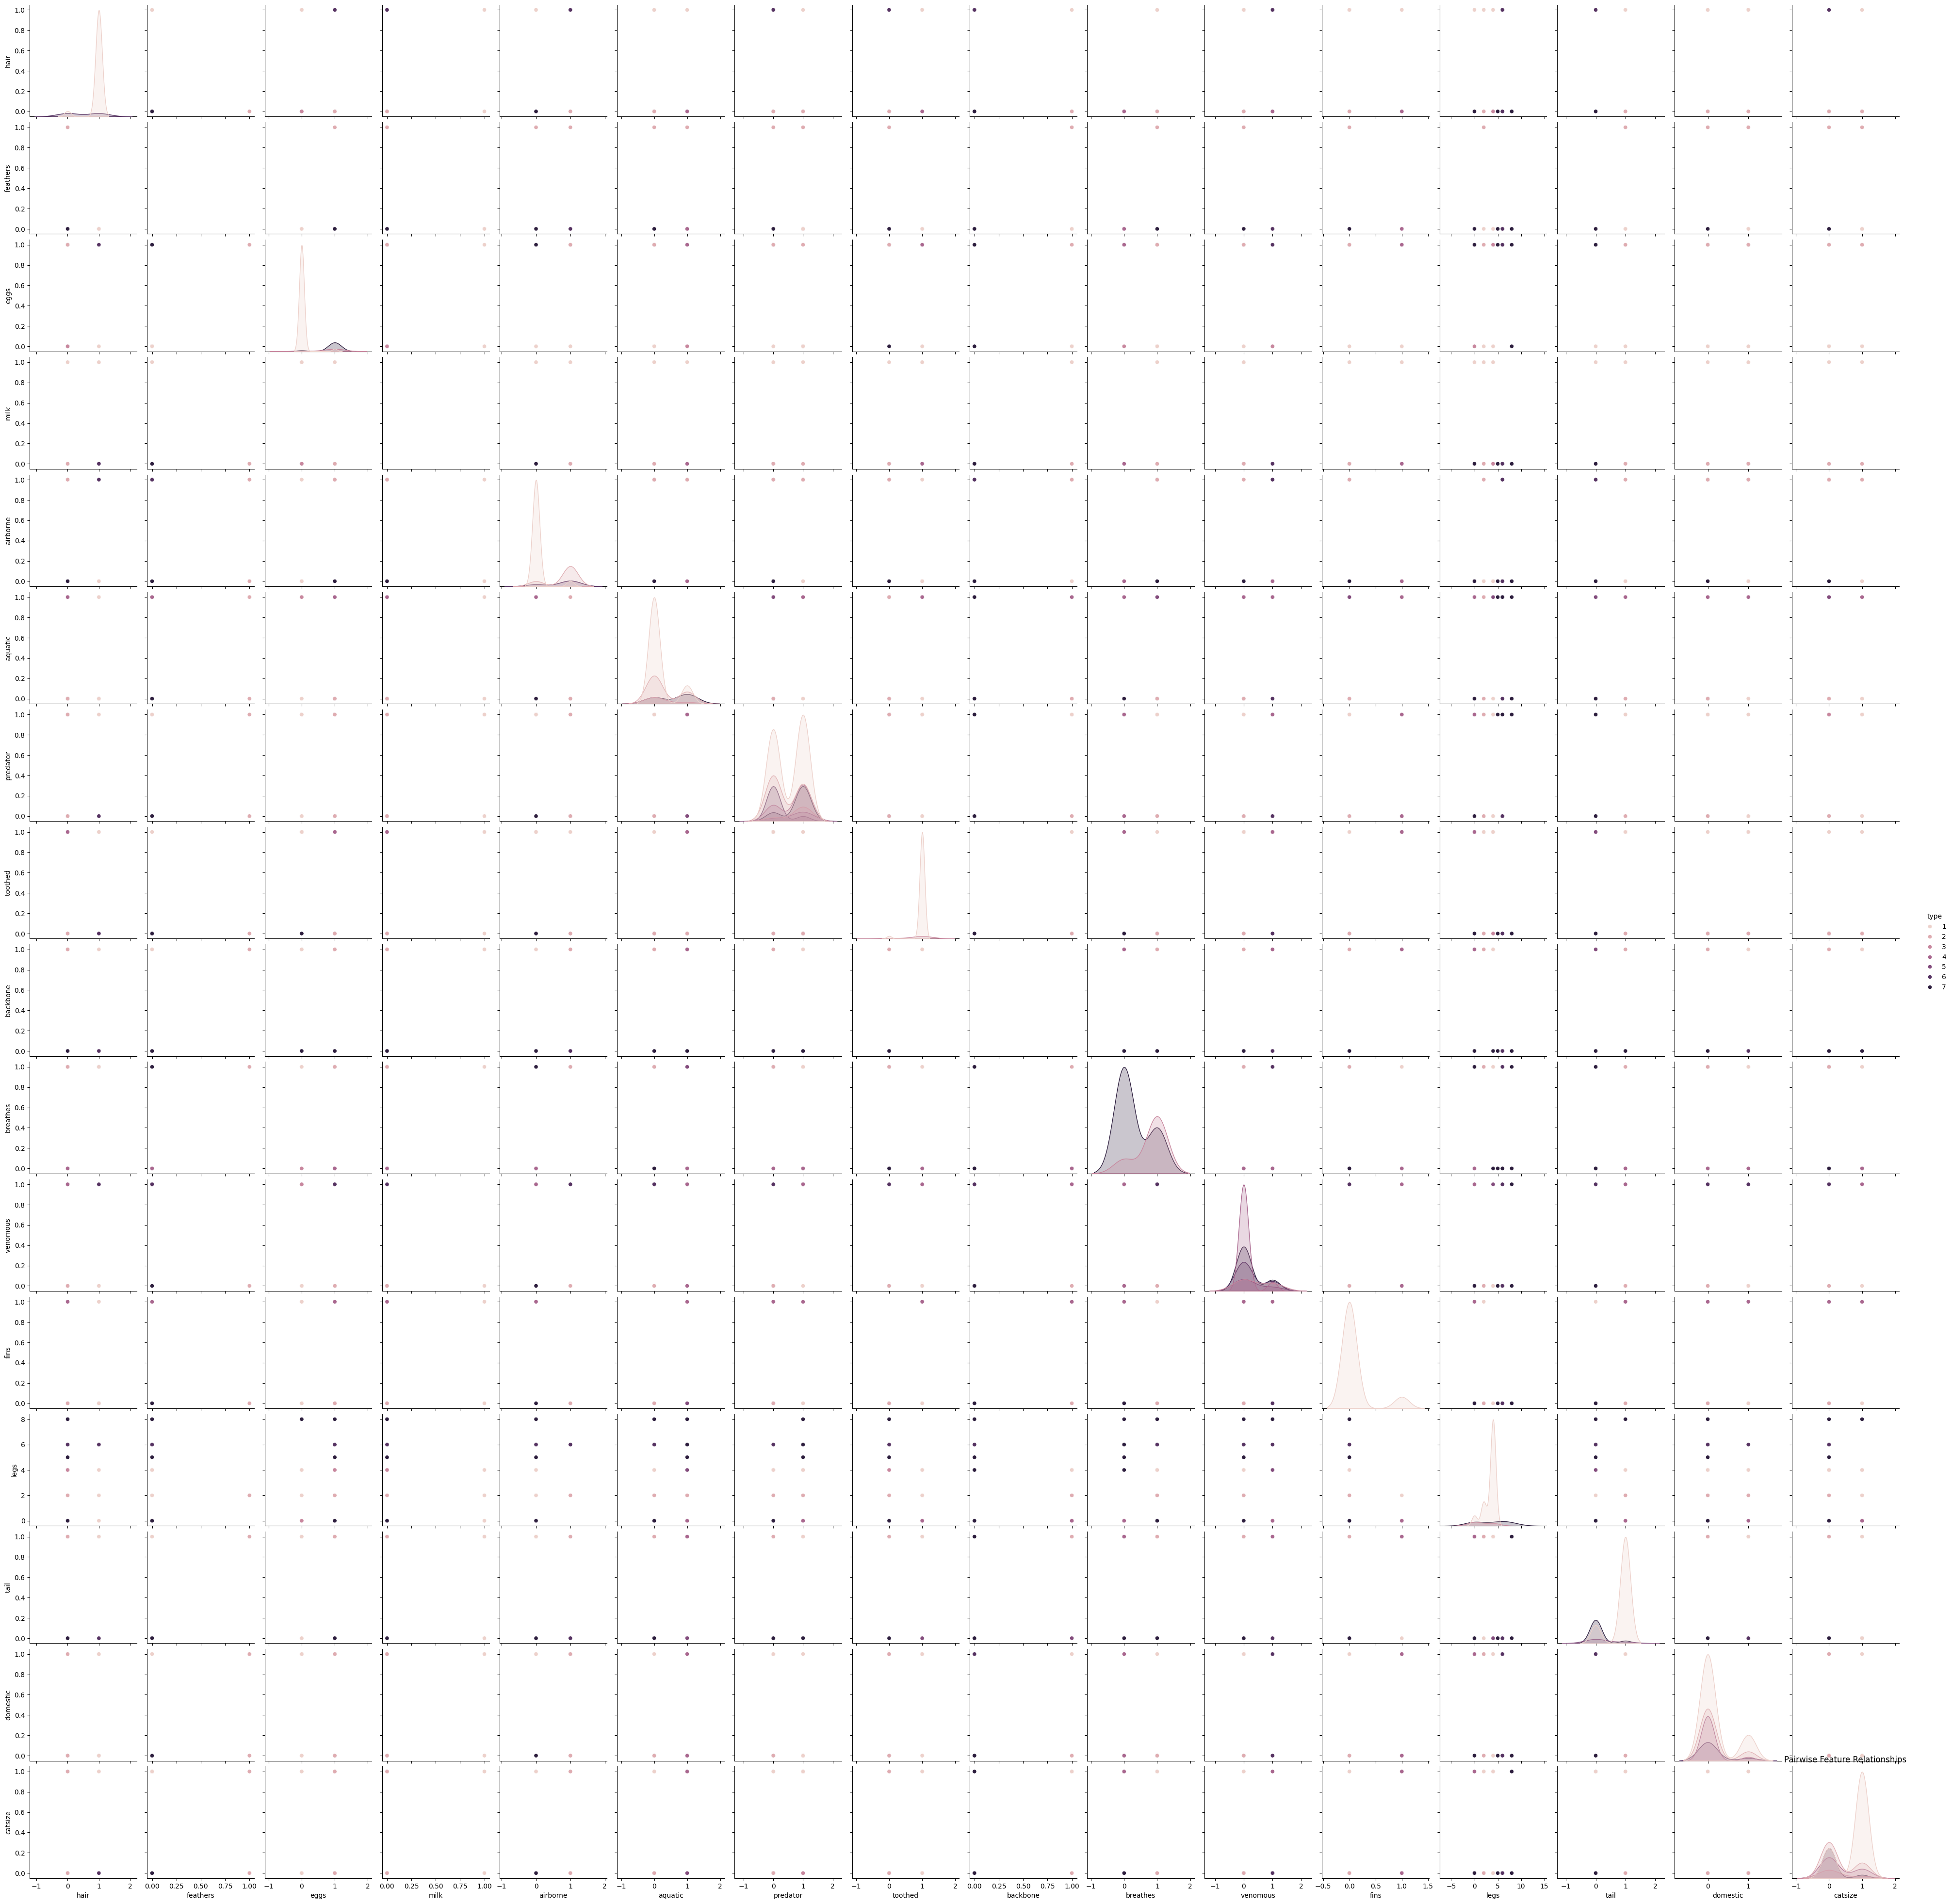

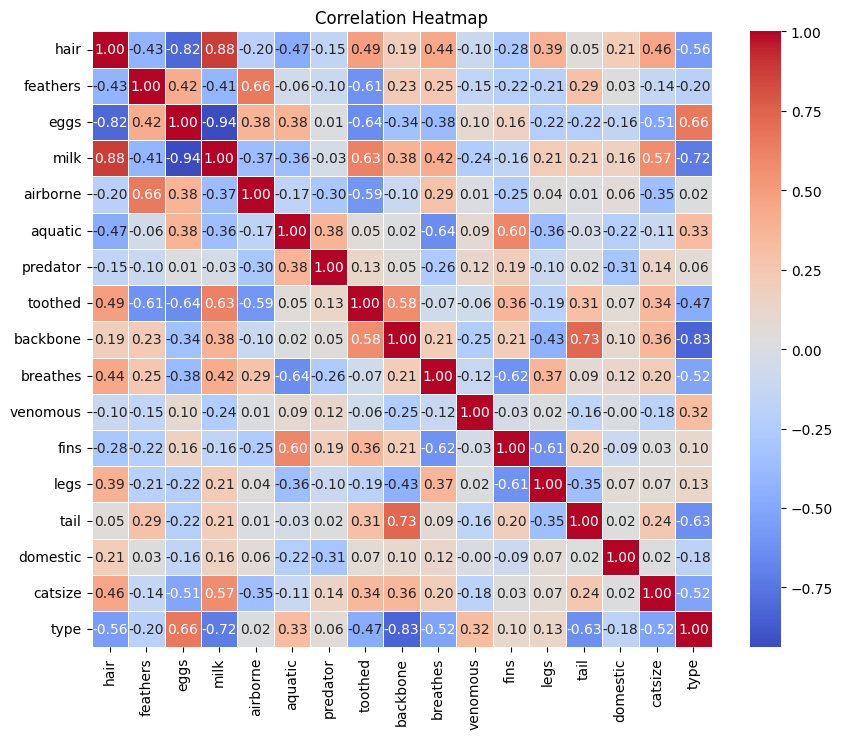

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("datasets/zoo.data", header=None)

# Set column names based on the provided information
column_names = [
    "animal_name", "hair", "feathers", "eggs", "milk", 
    "airborne", "aquatic", "predator", "toothed", "backbone", 
    "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "type"
]
data.columns = column_names

# Remove the animal_name column as it's not necessary for analysis
data = data.drop(columns=["animal_name"])

# 1. Distribution of Animal Types
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type')
plt.title('Distribution of Animal Types')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Binary Features
binary_features = column_names[1:-2]  # Exclude type and legs
plt.figure(figsize=(12, 8))
for feature in binary_features:
    sns.countplot(data=data, x='type', hue=feature)
    plt.title(f'Distribution of {feature} across Animal Types')
    plt.xlabel('Animal Type')
    plt.ylabel('Count')
    plt.legend(title=feature, loc='upper right')
    plt.show()

# 3. Distribution of Numeric Features
numeric_features = ['legs']
plt.figure(figsize=(12, 8))
for feature in numeric_features:
    sns.histplot(data=data, x=feature, hue='type', kde=True, bins=10)
    plt.title(f'Distribution of {feature} across Animal Types')
    plt.xlabel('Number of Legs')
    plt.ylabel('Frequency')
    plt.legend(title='Animal Type', loc='upper right')
    plt.show()

# 4. Pairwise Feature Relationships
sns.pairplot(data=data, hue='type', markers='o')
plt.title('Pairwise Feature Relationships')
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
